# 3  Python Programming on Clusters


In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import urllib #for downloading the data using the URL
import skimpy #cleaning column names and summary table
import os #for checking if the data folder and csv file exists
from myplot import myplot #importing custom plotting function I made

In [23]:
if not os.path.exists ('data/'):
        os.mkdir('data/')

if not os.path.exists('data/discharge_timeseries.csv'):

        url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3Ae248467d-e1f9-4a32-9e38-a9b4fb17cefb'

        msg = urllib.request.urlretrieve(url, 'data/discharge_timeseries.csv')

df = pd.read_csv('data/discharge_timeseries.csv')
df.head()

,Date,Total Pressure [m],Air Pressure [m],Stage [m],Discharge [m3/s],temperature [degrees C]
0,6/13/2016 0:00,9.816,9.609775,0.206225,0.083531,-0.1
1,6/13/2016 0:05,9.810,9.609715,0.200285,0.077785,-0.1
2,6/13/2016 0:10,9.804,9.609656,0.194344,0.072278,-0.1
3,6/13/2016 0:15,9.800,9.609596,0.190404,0.068756,-0.1
4,6/13/2016 0:20,9.793,9.609537,0.183463,0.062804,-0.1


In [24]:
clean_df = skimpy.clean_columns(df)
skimpy.skim(clean_df) #cool summary table

6 column names have been cleaned

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17856  │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %    ┃ mean     ┃ sd     ┃ p0        ┃ p25    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ total_pressure_m         │   0 │       0 │      9.9 │   0.12 │       9.6 │    9.8 │    10 │    10 │ ▁▅█▇▅▂ │  │
│ │ air_pressure_m           │   0 │       0 │      9.6 │   0.06 │       9.5 │    9.6 │   9.7 │   9.7 │ ▂▅▄▆█▃ │  │
│ │ stage_m                  │   0 │       0 │     0.28 │   0.12 │   0.00056 │   0.17 │  0.37 │  0.56 │ ▁█▇▇▆▁ │  │
│ │ discharge_m_3_s          │   0 │       0 │     0.22 │   0.19 │   4.7e-08 │  0.055 │  0.35 │  0.96 │  █▄▃▁  │  │
│ │ temperature_degrees_     │   8 │   0.045 │   -0.034 │  0.053 │      -0.1 │   -0.1 │     0 │   0.2 │   ▅█   │  │
│ └──────────────────────────┴─────┴─────────┴──────────┴────────┴───────────┴────────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date                      │       0 │          0 │                            2 │                    36000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [25]:
clean_df['date'] = pd.to_datetime(clean_df['date'])
skimpy.skim(clean_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17856  │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %    ┃ mean     ┃ sd     ┃ p0        ┃ p25    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ total_pressure_m         │   0 │       0 │      9.9 │   0.12 │       9.6 │    9.8 │    10 │    10 │ ▁▅█▇▅▂ │  │
│ │ air_pressure_m           │   0 │       0 │      9.6 │   0.06 │       9.5 │    9.6 │   9.7 │   9.7 │ ▂▅▄▆█▃ │  │
│ │ stage_m                  │   0 │       0 │     0.28 │   0.12 │   0.00056 │   0.17 │  0.37 │  0.56 │ ▁█▇▇▆▁ │  │
│ │ discharge_m_3_s          │   0 │       0 │     0.22 │   0.19 │   4.7e-08 │  0.055 │  0.35 │  0.96 │  █▄▃▁  │  │
│ │ temperature_degrees_     │   8 │   0.045 │   -0.034 │  0.053 │      -0.1 │   -0.1 │     0 │   0.2 │   ▅█   │  │
│ └──────────────────────────┴─────┴─────────┴──────────┴────────┴───────────┴────────┴───────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %     ┃ first            ┃ last                           ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ date               │     0 │        0 │    2016-06-13    │      2016-08-13 23:55:00       │ 5T             │  │
│ └────────────────────┴───────┴──────────┴──────────────────┴────────────────────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [26]:
clean_df = clean_df.rename(columns = {'date':'datetime'})
clean_df['date'] = clean_df['datetime'].dt.date
clean_df.head()


,datetime,total_pressure_m,air_pressure_m,stage_m,discharge_m_3_s,temperature_degrees_c,date
0,2016-06-13 00:00:00,9.816,9.609775,0.206225,0.083531,-0.1,2016-06-13
1,2016-06-13 00:05:00,9.810,9.609715,0.200285,0.077785,-0.1,2016-06-13
2,2016-06-13 00:10:00,9.804,9.609656,0.194344,0.072278,-0.1,2016-06-13
3,2016-06-13 00:15:00,9.800,9.609596,0.190404,0.068756,-0.1,2016-06-13
4,2016-06-13 00:20:00,9.793,9.609537,0.183463,0.062804,-0.1,2016-06-13


In [29]:
#setting a df for daily means
daily_flow = clean_df.groupby('date', as_index=False).mean(numeric_only = True)

Text(0, 0.5, 'Total Discharge')

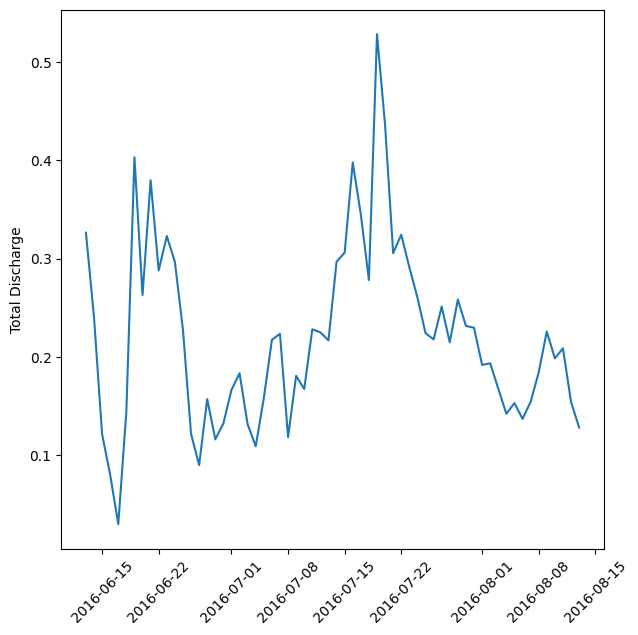

In [30]:
#plotting
var = 'discharge_m_3_s'
var_labs = {'discharge_m_3_s': 'Total Discharge'}

fig, ax = plt.subplots(figsize=(7, 7))
plt.plot(daily_flow['date'], daily_flow[var])
plt.xticks(rotation = 45)
ax.set_ylabel(var_labs.get('discharge_m_3_s'))

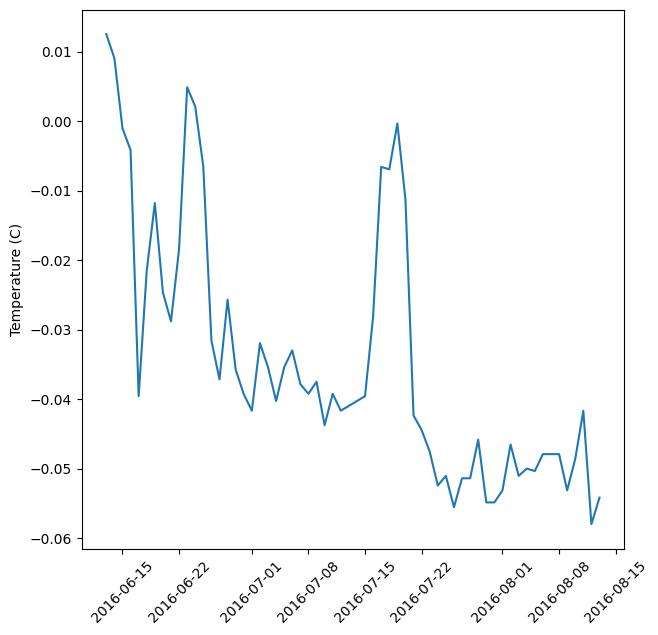

In [32]:
myplot(daily_flow, 'temperature_degrees_c')

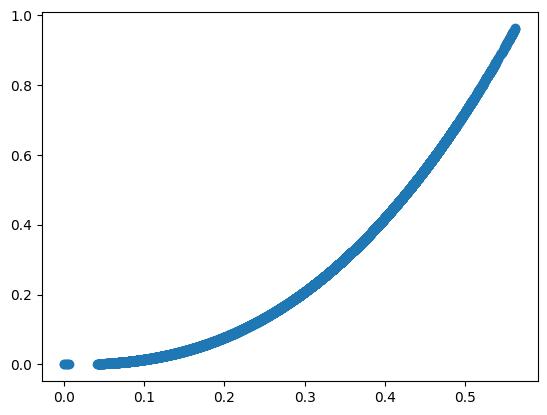

In [8]:
plt.scatter((df['Total Pressure [m]']-df['Air Pressure [m]']),df['Discharge [m3/s]'])

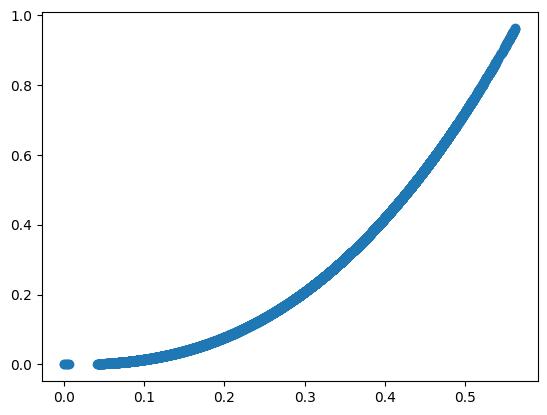

In [10]:
plt.scatter(df['Stage [m]'],df['Discharge [m3/s]'])